# Part 0: Generating Data


In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import sklearn.datasets
import sklearn.linear_model
from sklearn.metrics import accuracy_score
import pprint
pp = pprint.PrettyPrinter()
import pandas as pd

In [2]:
# Data Generating Process
def data(n=500,noise=0.1,random_state=60):
    X, t = sklearn.datasets.make_circles(n_samples=n,
                                       shuffle=True,
                                       noise=noise,
                                       random_state=random_state)
    # reshape t to a matrix T
    # reason: we want you to implement a neural network with a softmax output
    # this way your model will generalize to multiclass classification
    T = np.zeros(X.shape)
    T[:,0] = 1-t
    T[:,1] = t

    return X, T

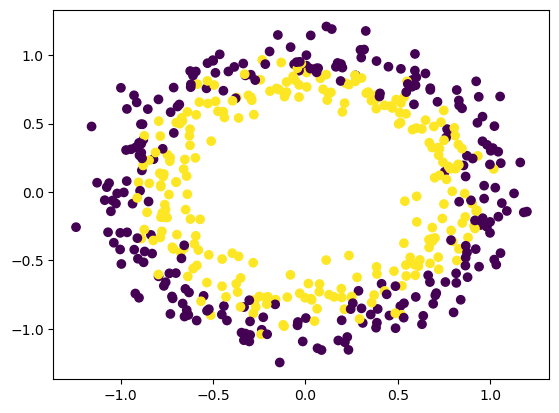

[0. 1.]


In [3]:
X, T = data()

# plot
plt.scatter(X[:,0],X[:,1],c=T[:,1])
plt.show()
print(np.unique(T))

## Part 1: Shallow Neural Network Model From Scratch


In [4]:
# Exercise
def init_params(d,M,K):
    """
    Purpose:
        Returns the weight matrices and bias vectors for both layers:
            Weight matrices are randomly initialized (standard normal distribution)
            Bias vectors are intialized with zeros
    Inputs:
        d   integer, number of feature inputs
        M   integer, number of hidden nodes
        K   integer, number of classes
    Output:
        params   disctionary of initial weights:
                 W1  (d,M) matrix
                 b1  (M,) vector
                 W2  (M,K) matrix
                 b2  (K,) vector
    """

    ### START CODE HERE ###

    W1 = np.random.randn(d, M)
    b1 = np.zeros((M,))

    W2 = np.random.randn(M, K)
    b2 = np.zeros((K,))




    ### END CODE HERE ###

    params = {'W1':W1,
              'b1':b1,
              'W2':W2,
              'b2':b2}

    return params

In [5]:
np.random.seed(42)
params = init_params(2,3,2)

pp.pprint(params)

{'W1': array([[ 0.49671415, -0.1382643 ,  0.64768854],
       [ 1.52302986, -0.23415337, -0.23413696]]),
 'W2': array([[ 1.57921282,  0.76743473],
       [-0.46947439,  0.54256004],
       [-0.46341769, -0.46572975]]),
 'b1': array([0., 0., 0.]),
 'b2': array([0., 0.])}


In [6]:
# you may use sklearns implementation of the softmax function
from sklearn.utils.extmath import softmax

In [7]:
def predict(X,params):
    """
    Purpose:
        Makes a prediction with the neural network
    Inputs:
        X        (n,d) matrix, features data
        params   dictionary of parameters: {'W1','b1','W2','b2'}
    Output:
        Y        (n,K) matrix, predicted probabilities
        interim  dictionary of intermediate values:{'A1','Z1','A2','Z2'}
    """
    # unpack dictionary
    W1 = params['W1']
    b1 = params['b1']
    W2 = params['W2']
    b2 = params['b2']

    ### START CODE HERE ###

    # Layer 1
    Z1 = np.dot(X, W1) + b1
    A1 = np.maximum(Z1, 0)   #ReLU

    # Layer 2
    Z2 = np.dot(A1, W2) + b2
    A2 = softmax(Z2)
    Y = A2




    #### END CODE HERE ###

    interim = {'A1':A1,
               'Z1':Z1,
               'A2':A2,
               'Z2':Z2}

    return Y, interim

In [8]:
Y, interim = predict(X,params)
print(Y[0:3,:])

[[0.53758954 0.46241046]
 [0.45046513 0.54953487]
 [0.77039216 0.22960784]]


In [9]:
# you may use sklearns implementation of the cross entropy loss:
from sklearn.metrics import log_loss
from sklearn.metrics import accuracy_score
import time


In [10]:

def gradient(params, interim, X, T):
    """
    Purpose:
        Get gradients for params
    Inputs:
        params   dictionary of parameters: {'W1','b1','W2','b2'}
        interim  dictionary of intermediate values:{'A1','Z1','A2','Z2'}
        X        (n,d) matrix, features data
        T        (N,K) matrix, target data
    Outputs:
        grads    dictionary of gradients
    """
    n = X.shape[0]

    # unpack dictionary
    W1 = params['W1']
    W2 = params['W2']
    b1 = params['b1']
    b2 = params['b2']

    A1 = interim['A1']
    A2 = interim['A2']
    Z1 = interim['Z1']
    Z2 = interim['Z2']

    # Backpropagation: Step 1 (for the output layer)
    dZ2 = Z2 - T
    dW2 = (1 / n) * Z1.T @ dZ2
    db2 = (1 / n) * dZ2.sum(axis=0)


    # Backpropagation: Step 2 (for the hidden layer)

    ### START CODE HERE ###


    dZ1 = (dZ2 @ W2.T) * (Z1 > 0) # To compute the gradient with respect to the output of the hidden layer
    dW1 = (1 / n) * X.T @ dZ1
    db1 = (1 / n) * dZ1.sum(axis=0)




    ### END CODE HERE ###

    # store into dictionary
    grads = {'W1':dW1,
             'b1':db1,
             'W2':dW2,
             'b2':db2,
            }

    return grads

In [11]:
def update(params,grads, eta, wd):
    """
    Purpose:
        Update all parameters based on SGD with l2 regularization/weight decay
    Inputs:
        params    dictionary of parameters
        grads     dictionary of gradients
        eta       double, learning rate
        wd        double, weight decay/regularization parameter lambda
    Outputs:
        params    dictionary of updated parameters
    """

    ### START CODE HERE ###

    # Update weights with regularization
    params['W1'] = (1 - eta * wd) * params['W1'] - eta * grads['W1']
    params['W2'] = (1 - eta * wd) * params['W2'] - eta * grads['W2']

    # Update biases without regularization
    params['b1'] = params['b1'] - eta * grads['b1']
    params['b2'] = params['b2'] - eta * grads['b2']




    ### END CODE HERE ###

    return params

In [12]:
np.random.seed(42)
params = init_params(2,3,2)
Y, interim = predict(X,params)
grads = gradient(params, interim, X, T)

eta = 0.05
wd = 0.07
upd = update(params,grads, eta, wd)
pp.pprint(upd)

# Initialize dictionary to store computation times and  model performance for part 3
computation_times = {}
model_performance = []

{'W1': array([[ 0.48831761, -0.13685832,  0.64447456],
       [ 1.48573001, -0.23182113, -0.22346679]]),
 'W2': array([[ 1.52823619,  0.74619836],
       [-0.46047257,  0.5435143 ],
       [-0.45915066, -0.46126258]]),
 'b1': array([-0.03684645, -0.00086701, -0.00405815]),
 'b2': array([-0.00530216,  0.0096565 ])}


In [13]:
def model(X,T,M,epochs,eta,wd,verbose=True):
    """
    Purpose:
        Estimates a neural network model with one hidden layer
    Inputs:
        X      (n,d) matrix, input values
        T      (N,K) matrix, target data
        M      integer, number of hidden nodes
        epochs integer, number of epochs
        eta    double, learning rate
        wd     double, weight decay/regularization parameter
    Outputs:
        params  dictionary of parameters
    """
    np.random.seed(42)

    # get dims
    n = X.shape[0]
    d = X.shape[1]
    K = T.shape[1]

    ### START CODE HERE ###
    # init params
    params = init_params(d, M, K)

    # for training loop:
    for i in range(epochs):
        # predict
        Y, interim = predict(X, params)

        # loss
        #true_labels = np.argmax(T, axis=1)
        #predicted_probs = Y[np.arange(n), true_labels]
        #loss = log_loss(true_labels, predicted_probs)
        loss = log_loss(T, Y)

        # gradient
        grads = gradient(params, interim, X, T)

        # update
        params = update(params, grads, eta, wd)

    ### END CODE HERE ###

        # print
        if verbose and i % 1000 == 0:
            print(f'epoch {i} -- loss: {loss:.2f}')

    return params

In [14]:
# create train and test set
X_train,T_train = data(n=300,noise=0.4,random_state=42)
X_test,T_test = data(n=1000,noise=0.4,random_state=43)


Weight decay = 0.0
epoch 0 -- loss: 2.15
epoch 1000 -- loss: 0.66
epoch 2000 -- loss: 0.65
epoch 3000 -- loss: 0.65
epoch 4000 -- loss: 0.65
Loss on test set for weight decay 0.0: 0.6815175477321703
Accuracy on test set for weight decay 0.0: 0.552

Weight decay = 0.01
epoch 0 -- loss: 2.15
epoch 1000 -- loss: 0.67
epoch 2000 -- loss: 0.67
epoch 3000 -- loss: 0.68
epoch 4000 -- loss: 0.68
Loss on test set for weight decay 0.01: 0.6884266854248304
Accuracy on test set for weight decay 0.01: 0.563


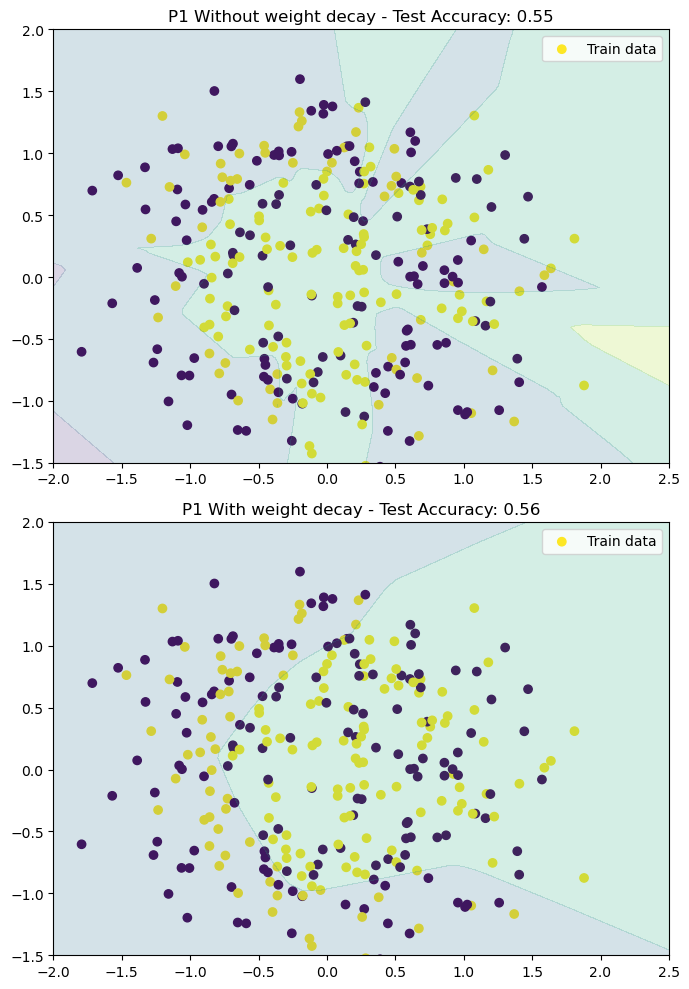

In [15]:
import time  # Import time module to record training and prediction times

# Show predictions with neural net
weight_decays = [0.0, 0.01]

fig = plt.figure(figsize=(7, 10))
i = 0


for weight_decay in weight_decays:
    i += 1
    model_name = 'P1 Without weight decay' if weight_decay == 0 else 'P1 With weight decay'
    print(f'\nWeight decay = {weight_decay}')
    
    # Train the model
    params = model(X_train, T_train,
                   M=40,epochs=5000,eta=0.05,
                   wd=weight_decay,
                   verbose=True)
   
    
    # Make prediction on mesh grid for plotting decision boundary
    x1_mesh, x2_mesh = np.meshgrid(np.linspace(-2, 2.5, 100), np.linspace(-1.5, 2, 100))
    X_mesh = np.array([x1_mesh, x2_mesh]).reshape(2, -1).T
    Y_mesh, _ = predict(X_mesh, params)
    
    # Make prediction on test set
    Y_test, _ = predict(X_test, params)
    
    # Calculate and print loss on test set
    test_loss = log_loss(T_test, Y_test)
    print(f'Loss on test set for weight decay {weight_decay}:', test_loss)
    
    # Calculate accuracy on test set
    acc = accuracy_score(T_test[:, 1], Y_test[:, 1] > 0.5)
    print(f'Accuracy on test set for weight decay {weight_decay}:', acc)
    
    
    # Plot
    ax = fig.add_subplot(2, 1, i)
    ax.set_title(f'{model_name} - Test Accuracy: {acc:.2f}')
    ax.scatter(X_train[:, 0], X_train[:, 1], c=T_train[:, 1], label='Train data')
    ax.contourf(x1_mesh, x2_mesh, Y_mesh[:, 1].reshape(100, 100), alpha=0.2, levels=np.linspace(0, 1, 5))
    ax.set_xlim(-2, 2.5)
    ax.set_ylim(-1.5, 2)
    ax.legend()

fig.tight_layout()
plt.show()


## Part 2: Implementing Deep Neural Networks Using Keras

In [16]:
import tensorflow as tf
import random as python_random

# Set the seeds to reproduce results
np.random.seed(2022)
python_random.seed(2022)
tf.random.set_seed(2022)

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import regularizers


In [17]:
# indicate we want to use a sequential neural network
model_p2 = keras.Sequential()

## Start Code Here ##

# add the first hidden layer, remember to add L2 regularizer
model_p2.add(layers.Dense(20, activation = 'relu', kernel_regularizer = regularizers.l2(0.01),input_shape = (X.shape[1],))) ## X.shape[1] is the number of feature of our data

# add the second hidden layer, remember to add L2 regularizer
model_p2.add(layers.Dense(10, activation = 'relu', kernel_regularizer = regularizers.l2(0.01)))

# add the third hidden layer, no L2 regularizer
model_p2.add(layers.Dense(10, activation = 'relu'))

# add output layer, no L2 regularizer
model_p2.add(layers.Dense(2, activation = 'softmax'))

## End Code Here ##

In [18]:
## Start Code Here ##

# compile the model
model_p2.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

# fit the model
epochs = 1000
batchs = len(X_train) ## batch gradient descent with training set

model_p2_fit = model_p2.fit(X_train,T_train, batch_size = batchs, epochs = epochs, verbose = True, validation_data = (X_test,T_test)) ## validate with testing set

## END Code Here ##

Epoch 1/1000


2023-11-06 21:36:45.126569: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


1/1 [==============================] - 0s 368ms/step - loss: 0.8780 - accuracy: 0.4967 - val_loss: 0.8812 - val_accuracy: 0.4900
Epoch 2/1000
1/1 [==============================] - 0s 19ms/step - loss: 0.8764 - accuracy: 0.5100 - val_loss: 0.8796 - val_accuracy: 0.4800
Epoch 3/1000
1/1 [==============================] - 0s 20ms/step - loss: 0.8748 - accuracy: 0.5000 - val_loss: 0.8779 - val_accuracy: 0.4710
Epoch 4/1000
1/1 [==============================] - 0s 21ms/step - loss: 0.8733 - accuracy: 0.5000 - val_loss: 0.8763 - val_accuracy: 0.4660
Epoch 5/1000
1/1 [==============================] - 0s 20ms/step - loss: 0.8717 - accuracy: 0.4900 - val_loss: 0.8747 - val_accuracy: 0.4650
Epoch 6/1000
1/1 [==============================] - 0s 20ms/step - loss: 0.8702 - accuracy: 0.4833 - val_loss: 0.8731 - val_accuracy: 0.4740
Epoch 7/1000
1/1 [==============================] - 0s 21ms/step - loss: 0.8687 - accuracy: 0.4833 - val_loss: 0.8716 - val_accuracy: 0.4810
Epoch 8/1000
1/1 [=======

32/32 [==============================] - 0s 482us/step - loss: 0.6927 - accuracy: 0.5720
Test Accuracy: 0.5720000267028809


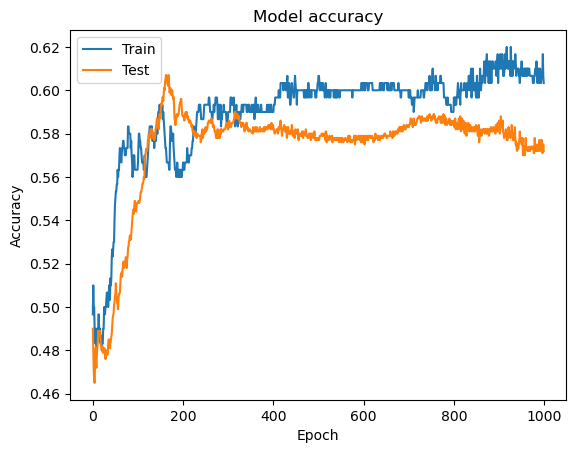

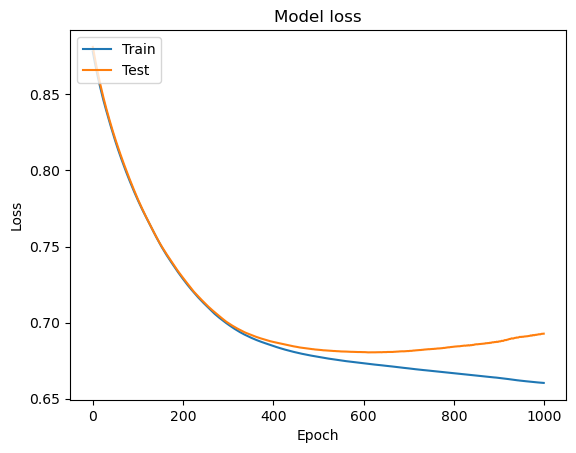

In [19]:
# get loss and accuracy
loss, acc = model_p2.evaluate(X_test,T_test)

print(f'Test Accuracy: {acc}')

# Plot training & validation accuracy values
plt.plot(model_p2_fit.history['accuracy'])
plt.plot(model_p2_fit.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(model_p2_fit.history['loss'])
plt.plot(model_p2_fit.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

## Part 3: Support Vector Machine with Linear Programming

In [20]:
import gurobipy as gp
import numpy as np
from gurobipy import Model, GRB
from sklearn.metrics import accuracy_score
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC, SVC

from tabulate import tabulate
import time



In [21]:
X_train, X_test, T_train, T_test = train_test_split(X, T, test_size=0.33, random_state=42) #data frrom Part 0

T_train = np.argmax(T_train, axis=1)
T_test = np.argmax(T_test, axis=1)

def dh(z, xi):
    return np.where(z < 1.0 - xi, -1.0, np.where(z > 1.0 + xi, 1.0, 0.0))

def fi(betas, X, T):
    p = len(X)
    beta = betas[:p]
    beta0 = betas[p]
    return T * (np.dot(beta, X) + beta0)

def gfi(X, T):
    p = len(X)
    grad = np.zeros(p + 1)
    grad[:p] = T * X
    grad[p] = T
    return grad

def gf(betas, X, T, xi, C):
    if T.ndim == 0:
        s = 1
        p = len(X)
    else:
        s = len(X)
        p = X.shape[1]

    beta = betas[:p]
    grad = np.zeros_like(betas)
    
    if T.ndim == 0:
        grad += dh(fi(betas, X, T), xi) * gfi(X, T)
    else:
        for j in range(s):
            z = fi(betas, X[j], T[j])
            dh_value = dh(z, xi)
            gfi_value = gfi(X[j], T[j])
            grad += dh_value * gfi_value
    
    grad *= (C / s)
    grad[:p] += beta
    return grad


rng = np.random.default_rng()
n, p = X_train.shape
xi = 1.0e-4
C = 1.0
betas = rng.standard_normal(p + 1)
alpha = 1.0e-3
batchsize = 10
K = 100  




In [22]:
# LP-SVM (Primal) with Gurobi - Training
def linear_svm_primal_gurobi(X, T, C):
    n_samples, n_features = X.shape
    m = Model("svm_primal")
    w = m.addMVar(shape=n_features, name="w")
    xi = m.addMVar(shape=n_samples, name="xi")
    b = m.addVar(name="b")
    m.setObjective(0.5 * w @ w + C * xi.sum(), GRB.MINIMIZE)
    for i in range(n_samples):
        m.addConstr(T[i] * (w @ X[i] + b) >= 1 - xi[i], name=f"margin_{i}")
    m.optimize()
    return m, w.X, b.X

start_train_time = time.time()
primal_model, primal_w, primal_b = linear_svm_primal_gurobi(X_train, T_train, C)
end_train_time = time.time()
primal_train_time = end_train_time - start_train_time

# LP-SVM (Primal) with Gurobi - Prediction
def predicts(X, w, b):
    return np.sign(X @ w + b)

start_predict_time = time.time()
T_prep = predicts(X_test, primal_w, primal_b)
end_predict_time = time.time()
primal_predict_time = end_predict_time - start_predict_time

# Calculate accuracy
primal_accuracy = accuracy_score(T_test, T_prep)


computation_times['LP-SVM (Primal) with Gurobi - Training'] = primal_train_time
computation_times['LP-SVM (Primal) with Gurobi - Prediction'] = primal_predict_time
model_performance.append({'Method': 'LP-SVM (Primal) with Gurobi','Accuracy': primal_accuracy,
    'Training Time (seconds)': primal_train_time,'Prediction Time (seconds)': primal_predict_time})


Set parameter Username
Academic license - for non-commercial use only - expires 2024-11-03
Gurobi Optimizer version 10.0.3 build v10.0.3rc0 (mac64[arm])

CPU model: Apple M1
Thread count: 8 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 335 rows, 338 columns and 833 nonzeros
Model fingerprint: 0x5401cb80
Model has 2 quadratic objective terms
Coefficient statistics:
  Matrix range     [2e-03, 1e+00]
  Objective range  [1e+00, 1e+00]
  QObjective range [1e+00, 1e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 1e+00]
Presolve removed 335 rows and 338 columns
Presolve time: 0.00s
Presolve: All rows and columns removed

Barrier solved model in 0 iterations and 0.00 seconds (0.00 work units)
Optimal objective 1.69000000e+02


In [23]:
from gurobipy import Model, GRB, quicksum
import numpy as np

def linear_svm_dual_gurobi_min(X, T, C):
    n_samples, n_features = X.shape
    T_dual = 2 * T - 1 
    
    dual_model = Model("svm_dual_min")
    alphas = dual_model.addVars(n_samples, lb=0, ub=C, vtype=GRB.CONTINUOUS, name="alpha")
    
    Q = np.outer(T_dual, T_dual) * (X @ X.T)
    quad_expr = quicksum(0.5 * Q[i, j] * alphas[i] * alphas[j] for i in range(n_samples) for j in range(n_samples))
    lin_expr = quicksum(-alphas[i] for i in range(n_samples))
  
    dual_model.setObjective(quad_expr + lin_expr, GRB.MINIMIZE)
    dual_model.addConstr(quicksum(alphas[i] * T_dual[i] for i in range(n_samples)) == 0, name="eq")
    dual_model.optimize()
    
    alpha_values = dual_model.getAttr('x', alphas)
    
    return dual_model, alpha_values


def predict_dual(X, alphas, X_train, T_train, w, b):
    # Extract support vectors and their corresponding alphas and labels
    support_vectors_indices = [i for i, alpha in enumerate(alphas) if alpha > 1e-5]
    X_support_vectors = X_train[support_vectors_indices]
    y_support_vectors = T_train[support_vectors_indices]
    alphas_support_vectors = [alphas[i] for i in support_vectors_indices]

    # Compute the kernel between the test data and support vectors
    kernel_value = np.dot(X, X_support_vectors.T)

    # Compute the predictions
    predictions = np.sign(np.dot(kernel_value, alphas_support_vectors * y_support_vectors) + b)
    
    return predictions


# Trainig dual model 
start_train_time = time.time()
dual_model, dual_alphas_min = linear_svm_dual_gurobi_min(X_train, T_train, C)
end_train_time = time.time()
dual_train_time = end_train_time - start_train_time

alpha_vals = np.array(list(dual_alphas_min.values()))
w_min = np.sum(alpha_vals[:, np.newaxis] * (2 * T_train - 1)[:, np.newaxis] * X_train, axis=0)
support_vectors_indices_min = [i for i, alpha in enumerate(alpha_vals) if alpha > 1e-5]
b_min = np.mean([(2 * T_train[i] - 1) - np.dot(w_min, X_train[i]) for i in support_vectors_indices_min])

#prediction 
start_predict_time = time.time()
T_pred_dual = predict_dual(X_test, dual_alphas_min, X_train, T_train, w_min, b_min)
end_predict_time = time.time()
dual_predict_time = end_predict_time - start_predict_time

#accuracy 
dual_accuracy = accuracy_score(T_test, T_pred_dual)

model_performance.append({
    'Method': 'LP-SVM (Dual) with Gurobi', 'Accuracy': dual_accuracy, 
    'Training Time (seconds)': dual_train_time, 'Prediction Time (seconds)': dual_predict_time})


Gurobi Optimizer version 10.0.3 build v10.0.3rc0 (mac64[arm])

CPU model: Apple M1
Thread count: 8 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 1 rows, 335 columns and 335 nonzeros
Model fingerprint: 0xebd8d148
Model has 56280 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+00, 1e+00]
  QObjective range [3e-05, 3e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [0e+00, 0e+00]
Presolve time: 0.01s
Presolved: 1 rows, 335 columns, 335 nonzeros
Presolved model has 56280 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 Free vars  : 2
 AA' NZ     : 3.000e+00
 Factor NZ  : 6.000e+00
 Factor Ops : 1.400e+01 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0  -3.35167411e+05 -3.35167500e+05  5.26e+03 1.26e-08  1.00e+06     0s
   1  -3.426538

In [24]:
# SGD for SVM
sgd_accuracies = []
training_start_time = time.time()  
K = 10000
for k in range(K):
    j = rng.choice(range(n), batchsize, replace=False)
    betas -= alpha * gf(betas, X_train[j], T_train[j], xi, C)

training_end_time= time.time()  
training_time = training_end_time - training_start_time  


prediction_start_time = time.time() 
that = np.sign(X_test @ betas[:p] + betas[-1])
prediction_end_time = time.time() 
prediction_time = prediction_end_time - prediction_start_time  


final_accuracy = accuracy_score(T_test, that)
model_performance.append({'Method': 'SGD for SVM','Accuracy': final_accuracy, 
    'Training Time (seconds)': training_time,'Prediction Time (seconds)': prediction_time})




In [25]:
# Linear SVM - Training Time
start_train_time = time.time()
linear_svm = LinearSVC(max_iter=K, dual=False)
linear_svm.fit(X_train, T_train)
end_train_time = time.time()
linear_svm_train_time = end_train_time - start_train_time

# Linear SVM - Prediction Time
start_predict_time = time.time()
that = linear_svm.predict(X_test)
end_predict_time = time.time()
linear_svm_predict_time = end_predict_time - start_predict_time

# Calculate accuracy
linear_svm_accuracy = accuracy_score(T_test, that)


computation_times['Linear SVM - Training'] = linear_svm_train_time
computation_times['Linear SVM - Prediction'] = linear_svm_predict_time 
model_performance.append({'Method': 'Linear SVM','Accuracy': linear_svm_accuracy,
                          'Training Time (seconds)': linear_svm_train_time,'Prediction Time (seconds)': linear_svm_predict_time})


In [26]:
# Simple Kernel SVM - Training Time
start_train_time = time.time()
a = np.mean(X_train[T_train == 1], axis=0) 
nrm2 = np.linalg.norm(X_train - a, axis=1)  
X_trainbar = np.hstack((X_train, nrm2.reshape(-1, 1)))  
svm_bar = LinearSVC(max_iter=K, dual=False)
svm_bar.fit(X_trainbar, T_train) 
end_train_time = time.time()
simple_kernel_train_time = end_train_time - start_train_time  

# Simple Kernel SVM - Prediction Time
start_predict_time = time.time()
nrm2_test = np.linalg.norm(X_test - a, axis=1)  
X_testbar = np.hstack((X_test, nrm2_test.reshape(-1, 1))) 
that = svm_bar.predict(X_testbar)  
end_predict_time = time.time()
simple_kernel_predict_time = end_predict_time - start_predict_time 

# Calculate accuracy
simple_kernel_accuracy = accuracy_score(T_test, that)


computation_times['Simple Kernel SVM - Training'] = simple_kernel_train_time
computation_times['Simple Kernel SVM - Prediction'] = simple_kernel_predict_time
model_performance.append({'Method': 'Simple Kernel SVM','Accuracy': simple_kernel_accuracy, 
    'Training Time (seconds)': simple_kernel_train_time,'Prediction Time (seconds)': simple_kernel_predict_time})


In [27]:
# Polynomial Kernel SVM - Training Time
start_train_time = time.time()
poly_svm = SVC(kernel='poly')
poly_svm.fit(X_train, T_train)
end_train_time = time.time()
poly_svm_train_time = end_train_time - start_train_time

# Polynomial Kernel SVM - Prediction Time
start_predict_time = time.time()
that = poly_svm.predict(X_test)
end_predict_time = time.time()
poly_svm_predict_time = end_predict_time - start_predict_time

# Calculate accuracy
poly_svm_accuracy = accuracy_score(T_test, that)

computation_times['SVM (Polynomial) - Training'] = poly_svm_train_time
computation_times['SVM (Polynomial) - Prediction'] = poly_svm_predict_time
model_performance.append({
    'Method': 'Polynomial Kernel SVM','Accuracy': poly_svm_accuracy,
    'Training Time (seconds)': poly_svm_train_time,'Prediction Time (seconds)': poly_svm_predict_time})


In [28]:
# RBF Kernel SVM - Training Time
start_train_time = time.time()
rbf_svm = SVC(kernel='rbf')
rbf_svm.fit(X_train, T_train)
end_train_time = time.time()
rbf_svm_train_time = end_train_time - start_train_time

# RBF Kernel SVM - Prediction Time
start_predict_time = time.time()
that = rbf_svm.predict(X_test)
end_predict_time = time.time()
rbf_svm_predict_time = end_predict_time - start_predict_time

# Calculate accuracy
rbf_svm_accuracy = accuracy_score(T_test, that)

computation_times['SVM (RBF) - Training'] = rbf_svm_train_time
computation_times['SVM (RBF) - Prediction'] = rbf_svm_predict_time
model_performance.append({
    'Method': 'SVM (RBF)','Accuracy': rbf_svm_accuracy,
    'Training Time (seconds)': rbf_svm_train_time,'Prediction Time (seconds)': rbf_svm_predict_time})



In [29]:
#Part 1 - Table 1
X_train, X_test, T_train, T_test = train_test_split(X, T, test_size=0.33, random_state=42)

start_train_time = time.time()
params = model(X_train, T_train, M=2, epochs=5000, eta=0.05, wd=0.07, verbose=True)
train_time = time.time() - start_train_time
    
start_predict_test_time = time.time()
Y_test, _ = predict(X_test, params)
predict_test_time = time.time() - start_predict_test_time
    
test_loss = log_loss(T_test, Y_test)
acc = accuracy_score(T_test[:, 1], Y_test[:, 1] > 0.5)
    
   
    
model_name_p1 = 'P1 Model'
computation_times[model_name_p1] = {'Training Time (seconds)': train_time, 'Prediction Time (seconds)': predict_test_time}
    
model_performance.append({'Method': model_name_p1,'Accuracy': acc,
                                 'Training Time (seconds)': train_time,
                                 'Prediction Time (seconds)': predict_test_time})

epoch 0 -- loss: 0.71
epoch 1000 -- loss: 0.69
epoch 2000 -- loss: 0.69
epoch 3000 -- loss: 0.69
epoch 4000 -- loss: 0.69


In [30]:
#Part2 - Table 1
X_train, X_test, T_train, T_test = train_test_split(X, T, test_size=0.33, random_state=42)


## Start Code Here ##

# Train and calculate train time
nn2_new_training_time_start = time.time()
model_p2_fit = model_p2.fit(X_train,T_train, batch_size = batchs, epochs = epochs, verbose = True, validation_data = (X_test,T_test)) ## validate with testing set
nn2_new_training_time = time.time() - nn2_new_training_time_start

# Predict and calculate the predict time
nn2_new_prediction_time_start = time.time()
loss, acc = model_p2.evaluate(X_test,T_test)
nn2_new_prediction_time = time.time() - nn2_new_prediction_time_start

nn2_accuracy = max(nn2_new_fit.history['val_accuracy'])


Epoch 1/1000
2/2 [==============================] - 0s 37ms/step - loss: 0.6619 - accuracy: 0.6657 - val_loss: 0.6514 - val_accuracy: 0.6848
Epoch 2/1000
2/2 [==============================] - 0s 19ms/step - loss: 0.6456 - accuracy: 0.7075 - val_loss: 0.6531 - val_accuracy: 0.6545
Epoch 3/1000
2/2 [==============================] - 0s 16ms/step - loss: 0.6440 - accuracy: 0.6687 - val_loss: 0.6271 - val_accuracy: 0.6909
Epoch 4/1000
2/2 [==============================] - 0s 19ms/step - loss: 0.6220 - accuracy: 0.6985 - val_loss: 0.6283 - val_accuracy: 0.6121
Epoch 5/1000
2/2 [==============================] - 0s 18ms/step - loss: 0.6307 - accuracy: 0.6090 - val_loss: 0.6225 - val_accuracy: 0.6545
Epoch 6/1000
2/2 [==============================] - 0s 18ms/step - loss: 0.6225 - accuracy: 0.6657 - val_loss: 0.6110 - val_accuracy: 0.6909
Epoch 7/1000
2/2 [==============================] - 0s 18ms/step - loss: 0.6136 - accuracy: 0.6776 - val_loss: 0.6147 - val_accuracy: 0.6667
Epoch 8/1000


NameError: name 'nn2_new_fit' is not defined

In [31]:
computation_times['P2 Model'] = {'Training Time (seconds)': nn2_new_training_time, 'Prediction Time (seconds)': nn2_new_prediction_time}
model_performance.append({
    'Method': 'P2 Model','Accuracy': rbf_svm_accuracy,
    'Training Time (seconds)': nn2_new_training_time,'Prediction Time (seconds)': nn2_new_prediction_time})

In [32]:
#Start Table 2 now
computation_times_table2 = {}
model_performance_table2 = []

T_train = np.argmax(T_train, axis=1)
T_test = np.argmax(T_test, axis=1)

# LP(Primal) with Anchors /Simple Kernel 
# Compute the anchor point
a = np.mean(X_train[T_train == 1], axis=0) 

# Augment the training data with the Euclidean distance to the anchor point as a new feature
nrm2_train = np.linalg.norm(X_train - a, axis=1)
X_train_augmented = np.hstack((X_train, nrm2_train.reshape(-1, 1)))

# LP-SVM (Primal) with Gurobi - Training on augmented data
start_train_time = time.time()
primal_model, primal_w, primal_b = linear_svm_primal_gurobi(X_train_augmented, T_train, C)
end_train_time = time.time()
primal_train_time_new = end_train_time - start_train_time

# Augment the test data with the Euclidean distance to the anchor point as a new feature
nrm2_test = np.linalg.norm(X_test - a, axis=1)
X_test_augmented = np.hstack((X_test, nrm2_test.reshape(-1, 1)))

# LP-SVM (Primal) with Gurobi - Prediction on augmented data
start_predict_time = time.time()
T_pred = predicts(X_test_augmented, primal_w, primal_b)
end_predict_time = time.time()
primal_predict_time_new = end_predict_time - start_predict_time

# Calculate accuracy on augmented data
primal_accuracy_new = accuracy_score(T_test, T_pred)

# Record the performance and computation times
computation_times_table2['LP-SVM (Primal) with Gurobi - Training'] = primal_train_time_new
computation_times_table2['LP-SVM (Primal) with Gurobi - Prediction'] = primal_predict_time_new
model_performance_table2.append({
    'Method': 'LP-SVM (Primal) with Gurobi with Anchor','Accuracy': primal_accuracy_new,
    'Training Time (seconds)': primal_train_time_new,'Prediction Time (seconds)': primal_predict_time_new})



Gurobi Optimizer version 10.0.3 build v10.0.3rc0 (mac64[arm])

CPU model: Apple M1
Thread count: 8 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 335 rows, 339 columns and 999 nonzeros
Model fingerprint: 0xe9c9dcc1
Model has 3 quadratic objective terms
Coefficient statistics:
  Matrix range     [2e-03, 1e+00]
  Objective range  [1e+00, 1e+00]
  QObjective range [1e+00, 1e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 1e+00]
Presolve removed 335 rows and 339 columns
Presolve time: 0.00s
Presolve: All rows and columns removed

Barrier solved model in 0 iterations and 0.00 seconds (0.00 work units)
Optimal objective 1.69000000e+02


In [33]:
X_train, X_test, T_train, T_test = train_test_split(X, T, test_size=0.33, random_state=42)

# Compute the anchor point
anchor_point = np.mean(X_train[T_train == 1], axis=0)

# Augment data with the Euclidean distance to the anchor point as a new feature
X_train_augmented = np.hstack((X_train, np.linalg.norm(X_train - anchor_point, axis=1).reshape(-1, 1)))
X_test_augmented = np.hstack((X_test, np.linalg.norm(X_test - anchor_point, axis=1).reshape(-1, 1)))

In [35]:
start_train_time = time.time()
params = model(X_train_augmented, T_train, M=2, epochs=5000, eta=0.05, wd=0.07, verbose=True)
train_time = time.time() - start_train_time
    
start_predict_test_time = time.time()
Y_test, _ = predict(X_test_augmented, params)
predict_test_time = time.time() - start_predict_test_time
    
test_loss = log_loss(T_test, Y_test)
acc = accuracy_score(T_test[:, 1], Y_test[:, 1] > 0.5)
   
    
model_name_p1 = 'P1 Model with Anchor '
computation_times_table2[model_name_p1] = {'Training Time (seconds)': train_time, 'Prediction Time (seconds)': predict_test_time}
    
model_performance_table2.append({'Method': model_name_p1,'Accuracy': acc,
                                 'Training Time (seconds)': train_time,
                                 'Prediction Time (seconds)': predict_test_time})

epoch 0 -- loss: 0.74
epoch 1000 -- loss: 0.69
epoch 2000 -- loss: 0.69
epoch 3000 -- loss: 0.69
epoch 4000 -- loss: 0.69


In [36]:
# Part 2 training with augmented data

# Re-set NN
nn2_new = keras.Sequential()

nn2_new.add(layers.Dense(20, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(3,)))  # input shape changed to 3
nn2_new.add(layers.Dense(10, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
nn2_new.add(layers.Dense(10, activation='relu'))
nn2_new.add(layers.Dense(2, activation='softmax'))

nn2_new.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


epochs = 1000
batchs = len(X_trainbar)

# Train and calculate train time
nn2_new_training_time_start = time.time()
nn2_new_fit = nn2_new.fit(X_trainbar, T_train, batch_size=batchs, epochs=epochs, verbose=True, validation_data=(X_testbar, T_test))
nn2_new_training_time = time.time() - nn2_new_training_time_start

# Predict and calculate the predict time
nn2_new_prediction_time_start = time.time()
nn2_new_predictions = nn2_new.predict(X_testbar)
nn2_new_prediction_time = time.time() - nn2_new_prediction_time_start

nn2_accuracy = max(nn2_new_fit.history['val_accuracy'])


model_name_p2 = 'P2 Model with Anchor'
computation_times_table2[model_name_p2] = {'Training Time (seconds)': nn2_new_training_time, 'Prediction Time (seconds)': nn2_new_prediction_time}
model_performance_table2.append({
    'Method': 'P2 Model with Anchor','Accuracy': nn2_accuracy,
    'Training Time (seconds)': nn2_new_training_time,'Prediction Time (seconds)': nn2_new_prediction_time })

Epoch 1/1000
1/1 [==============================] - 0s 351ms/step - loss: 0.8744 - accuracy: 0.5104 - val_loss: 0.8724 - val_accuracy: 0.4970
Epoch 2/1000
1/1 [==============================] - 0s 17ms/step - loss: 0.8729 - accuracy: 0.5045 - val_loss: 0.8711 - val_accuracy: 0.4970
Epoch 3/1000
1/1 [==============================] - 0s 17ms/step - loss: 0.8714 - accuracy: 0.5015 - val_loss: 0.8697 - val_accuracy: 0.4909
Epoch 4/1000
1/1 [==============================] - 0s 18ms/step - loss: 0.8699 - accuracy: 0.5015 - val_loss: 0.8683 - val_accuracy: 0.4970
Epoch 5/1000
1/1 [==============================] - 0s 18ms/step - loss: 0.8685 - accuracy: 0.4955 - val_loss: 0.8669 - val_accuracy: 0.4909
Epoch 6/1000
1/1 [==============================] - 0s 18ms/step - loss: 0.8670 - accuracy: 0.5015 - val_loss: 0.8655 - val_accuracy: 0.5152
Epoch 7/1000
1/1 [==============================] - 0s 17ms/step - loss: 0.8656 - accuracy: 0.5045 - val_loss: 0.8641 - val_accuracy: 0.5152
Epoch 8/1000

In [37]:
df_model_performance = pd.DataFrame(model_performance)
df_model_performance = df_model_performance.sort_values(by='Method', ascending=True)

print("Table 1")
print(df_model_performance.to_string(index=False))

Table 1
                     Method  Accuracy  Training Time (seconds)  Prediction Time (seconds)
  LP-SVM (Dual) with Gurobi  0.236364                 3.617935                   0.000712
LP-SVM (Primal) with Gurobi  0.509091                 0.415299                   0.000045
                 Linear SVM  0.496970                 0.003913                   0.000180
                   P1 Model  0.490909                 2.570847                   0.000102
                   P2 Model  0.830303                19.685737                   0.038467
      Polynomial Kernel SVM  0.533333                 0.003597                   0.000951
                SGD for SVM  0.509091                 1.330169                   0.000057
                  SVM (RBF)  0.830303                 0.002517                   0.001609
          Simple Kernel SVM  0.818182                 0.001934                   0.000223


In [38]:
df_model_performance_table2 = pd.DataFrame(model_performance_table2)
df_model_performance_table2 = df_model_performance_table2.sort_values(by='Method', ascending=True)

print("Table 2")
print(df_model_performance_table2.to_string(index=False))

Table 2
                                 Method  Accuracy  Training Time (seconds)  Prediction Time (seconds)
LP-SVM (Primal) with Gurobi with Anchor  0.509091                 0.344390                   0.000326
                  P1 Model with Anchor   0.490909                 2.615966                   0.000125
                  P1 Model with Anchor   0.490909                 2.617051                   0.000091
                   P2 Model with Anchor  0.836364                19.236491                   0.114876


## Part 4: Stochastic Gradient Descent Variants


In [39]:
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC, SVC
import time

def dh(z, xi):

    if z < 1.0 - xi:
        return -1.0
    elif (z > 1.0 + xi):
        return 0.0

    return ((1.0/(4.0 * xi)))*(-2.0*(1.0 + xi - z))

def fi(betas, x, y):

    p = len(x)
    beta = betas[0:p]
    beta0 = betas[p]

    return y*(beta @ x + beta0)

def gfi(x, y):

    p = len(x)
    grad = np.zeros(p+1)
    grad[0:p] = y*x
    grad[p] = y

    return grad

def gf(betas, X, y, xi, C):

    if (len(y.shape) == 0):
        s = 1
        p = len(X)
    else:
        s, p = X.shape

    beta = betas[0:p]
    grad = np.zeros(p+1)

    if (len(y.shape) == 0):
        grad += dh(fi(betas, X, y), xi)*gfi(X, y)
    else:
        for j in range(s):
            grad += dh(fi(betas, X[j], y[j]), xi)*gfi(X[j], y[j])

    grad *= (C/s)
    grad[0:p] = beta + grad[0:p]

    return grad

randomState = 42
np.random.seed(randomState)
rng = np.random.default_rng(randomState)

bcdata = load_breast_cancer()
X, y = bcdata.data, bcdata.target
y[y==0] = -1

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=randomState)

n, p = X_train.shape
xi = 1.0e-4
C = 1.0

betas = rng.standard_normal(p+1)
avg_betas = rng.standard_normal(p+1)
betas_moment = rng.standard_normal(p+1)

alpha = 1.0e-3
gamma = 0.9
batchsize = 10

# SGD

start_time_0 = time.time()# Measure time
T = 1000
for t in range(T):
    j = rng.choice(range(n), batchsize)
    betas = betas - alpha * gf(betas, X_train[j], y_train[j], xi, C)

yhat = np.ones(len(y_test))
yhat[X_test @ betas[0:p] + betas[p] < 0.0] = -1
sgd_time = time.time() - start_time_0
print('SGD4SVM: \t\t\t {0:.4f}'.format(accuracy_score(yhat, y_test)))
print('SGD4SVM time: \t\t\t {0:.4f}'.format(sgd_time))
print()

# SGD Variant 1 (Averaging)

rng = np.random.default_rng(randomState)

# Setting cummulative gradinet for fisrt step
avg_gradient = np.zeros(p + 1)
start_time_1 = time.time()
for t in range(T):
       j = rng.choice(range(n), batchsize)
   #averaging
       avg_gradient += gf(avg_betas, X_train[j], y_train[j], xi, C) / (t + 1)
       avg_betas -= alpha * avg_gradient

# Prediction
yhat = np.ones(len(y_test))
yhat[X_test @ avg_betas[0:p] + avg_betas[p] < 0.0] = -1

# Time computation
avg_time = time.time() - start_time_1

# Printing output
print('SGD with Averaging: \t\t {0:.4f}'.format(accuracy_score(yhat, y_test)))
print('SGD with Averaging Time:\t {0:.4f}'.format(avg_time))
print()

# SGD Variant 2 (Momentum)
rng = np.random.default_rng(randomState)

# Setting zeros t-1 beta for first step
betas_0 = np.zeros(p + 1)

# Time computation
start_time_2 = time.time()

for t in range(T):
       j = rng.choice(range(n), batchsize)
   # Calculating beta with momentum
       betas_moment -= alpha * gf(betas, X_train[j], y_train[j], xi, C) + gamma * (betas_moment - betas_0)
   # Setting new t-1 beta
       betas_0 = betas.copy()

yhat = np.ones(len(y_test))

# Setting prediction
yhat[X_test @ betas_moment[0:p] + betas_moment[p] < 0.0] = -1

# Time computattion 
momentum_time = time.time() - start_time_2

# Printing output
print('SGD with Momentum: \t\t {0:.4f}'.format(accuracy_score(yhat, y_test)))
print('SGD with Momentum time: \t {0:.4f}'.format(momentum_time))

# Compare results obtained with the three methods above in terms of accuracies and computation times


SGD4SVM: 			 0.7661
SGD4SVM time: 			 0.0918

SGD with Averaging: 		 0.9240
SGD with Averaging Time:	 0.0924

SGD with Momentum: 		 0.9415
SGD with Momentum time: 	 0.0925


In [40]:
# Data generating process
def data_bonus(n = 500, noise = 0.1, random_state = 60):
    X, t = sklearn.datasets.make_circles(n_samples = n, shuffle = True, noise = noise, random_state = random_state)
    T = np.zeros((n, 2))
    T[:, 0] = 1 - t
    T[:, 1] = t
    return X, T

X_bonus, T_bonus = data_bonus()

X_train_bonus, T_train_bonus = data_bonus(n = 300, noise = 0.4, random_state = 42)
X_test_bonus, T_test_bonus = data_bonus(n = 1000, noise = 0.4, random_state = 43)

In [41]:
def update_with_momentum(params, grads, v, eta, wd, mu):
    """
    Purpose:
        Update all parameters based on SGD with momentum and l2 regularization/weight decay
    Inputs:
        params    dictionary of parameters
        grads     dictionary of gradients
        v         dictionary of velocities
        eta       double, learning rate
        wd        double, weight decay/regularization parameter lambda
        mu        double, momentum term
    Outputs:
        params    dictionary of updated parameters
        v         dictionary of updated velocities
    """

    # Update weights with momentum and regularization
    v['W1'] = mu * v['W1'] - eta * (grads['W1'] + wd * params['W1'])
    params['W1'] += v['W1']

    v['W2'] = mu * v['W2'] - eta * (grads['W2'] + wd * params['W2'])
    params['W2'] += v['W2']

    # Update biases without regularization
    params['b1'] += - eta * grads['b1']
    params['b2'] += - eta * grads['b2']

    return params, v

In [42]:
past_grads = []

def update_with_model_averaging(params, grads, eta, wd, past_grads, ki):
    """
    Purpose:
        Update all parameters based on SGD variant using the averages of the past approximate gradients
    Inputs:
        params      dictionary of parameters
        grads       dictionary of gradients
        eta         double, learning rate
        wd          double, weight decay/regularization parameter lambda
        past_grads  list of past gradients for each parameter
        ki           int, current iteration number
    Outputs:
        params      dictionary of updated parameters
    """
    
    past_grads.append(grads)
    
    grads_sum = {key: sum(g[key] for g in past_grads) for key in grads}
    averaged_grads = {key: grads_sum[key] / (ki + 1) for key in grads_sum}

    params['W1'] = (1 - eta * wd) * params['W1'] - eta * averaged_grads['W1']
    params['W2'] = (1 - eta * wd) * params['W2'] - eta * averaged_grads['W2']

    params['b1'] = params['b1'] - eta * averaged_grads['b1']
    params['b2'] = params['b2'] - eta * averaged_grads['b2']

    return params

In [43]:
np.random.seed(42)

epochs = 1000
eta = 0.001
wd = 0.0001
ki = 0
mu = 0.9  
n = X_bonus.shape[0]
d = X_bonus.shape[1]
K = T_bonus.shape[1]
M = 40
params = init_params(d, M, K)
v = {key: np.zeros_like(value) for key, value in params.items()}

sgd_variants = {
    'Regular SGD': update, 'Momentum SGD': update_with_momentum, 
    'Model Averaging': update_with_model_averaging}

for variant_name, update_function in sgd_variants.items():
    print(f'\nTraining with {variant_name}')
    
    start_time = time.time()
    for epoch in range(epochs):
        Y, interim = predict(X_train_bonus, params)
        grads = gradient(params, interim, X_train_bonus, T_train_bonus)
        
        if variant_name == 'Regular SGD':
            params = update_function(params, grads, eta, wd)
        elif variant_name == 'Momentum SGD':
            params, v = update_function(params, grads, v, eta, wd, mu)
        elif variant_name == 'Model Averaging':
            params = update_function(params, grads, eta, wd, past_grads, ki)
            ki += 1
        
        if epoch % 100 == 0:
            loss = log_loss(T_train_bonus[:, 1], Y[:, 1])
            print(f'Epoch {epoch} -- Loss: {loss:.4f}')

    end_time = time.time()
    time_taken = end_time - start_time
    print(f'Training time for {variant_name}: {time_taken:.2f} seconds\n')


Training with Regular SGD
Epoch 0 -- Loss: 2.1512
Epoch 100 -- Loss: 1.2919
Epoch 200 -- Loss: 1.1319
Epoch 300 -- Loss: 1.0454
Epoch 400 -- Loss: 0.9807
Epoch 500 -- Loss: 0.9294
Epoch 600 -- Loss: 0.8902
Epoch 700 -- Loss: 0.8598
Epoch 800 -- Loss: 0.8355
Epoch 900 -- Loss: 0.8160
Training time for Regular SGD: 0.19 seconds


Training with Momentum SGD
Epoch 0 -- Loss: 0.8003
Epoch 100 -- Loss: 0.7523
Epoch 200 -- Loss: 0.7348
Epoch 300 -- Loss: 0.7221
Epoch 400 -- Loss: 0.7125
Epoch 500 -- Loss: 0.7050
Epoch 600 -- Loss: 0.6990
Epoch 700 -- Loss: 0.6943
Epoch 800 -- Loss: 0.6906
Epoch 900 -- Loss: 0.6874
Training time for Momentum SGD: 0.18 seconds


Training with Model Averaging
Epoch 0 -- Loss: 0.6847
Epoch 100 -- Loss: 0.6839
Epoch 200 -- Loss: 0.6831
Epoch 300 -- Loss: 0.6823
Epoch 400 -- Loss: 0.6815
Epoch 500 -- Loss: 0.6808
Epoch 600 -- Loss: 0.6801
Epoch 700 -- Loss: 0.6794
Epoch 800 -- Loss: 0.6788
Epoch 900 -- Loss: 0.6782
Training time for Model Averaging: 1.06 seconds

